## 一項式迴歸

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col=0)

In [2]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


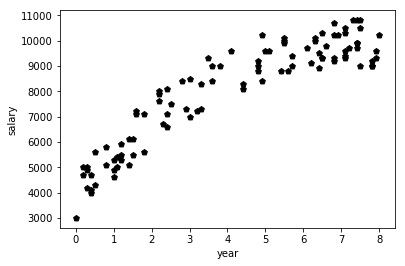

In [3]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black', marker='p')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

Populating the interactive namespace from numpy and matplotlib


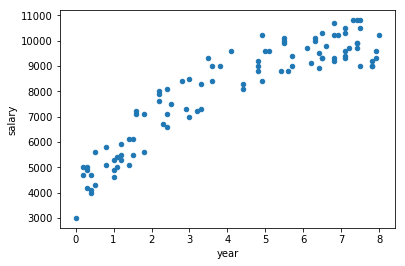

In [4]:
%pylab inline
df.plot(kind = 'scatter',x = 'year', y= 'salary')

In [5]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print('Coefficient: ', regr.coef_)

Coefficient:  [ 712.59413615]


In [7]:
print('Intercept: ', regr.intercept_)

Intercept:  5049.00989981


In [8]:
regr.predict(17)

array([ 17163.11021428])

In [9]:
employee = numpy.array([[5],[17],[13]])

In [10]:
import numpy
regr.predict(employee)

array([  8611.98058054,  17163.11021428,  14312.7336697 ])

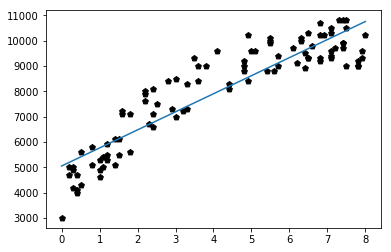

In [15]:
from matplotlib import pyplot as plt
X2 = X.sort_values('year')
plt.scatter(X, Y, color='black',marker='p')
plt.plot(X2, regr.predict(X2))
plt.show()

## 二項式迴歸

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_regr = PolynomialFeatures(degree = 2)
X_ = poly_regr.fit_transform(X)

In [17]:
regr = LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
employee = numpy.array([[5],[17],[13]])

In [19]:
X2 = poly_regr.fit_transform(employee)
regr.predict(X2)

array([ 9310.23228321, -2117.40898333,  5522.37363673])

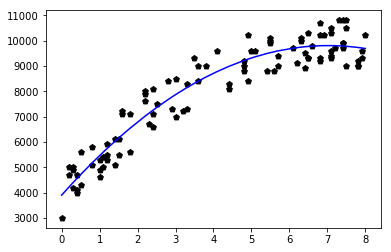

In [20]:
from matplotlib import pyplot as plt
X2 = X.sort_values(['year'])
X2_ =  poly_regr.fit_transform(X2)

plt.scatter(X, Y, color='black',marker='p')
plt.plot(X2, regr.predict(X2_), color= "blue")
plt.show()

## 三項式迴歸

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_regr = PolynomialFeatures(degree = 3)
X_ = poly_regr.fit_transform(X)

In [22]:
regr = LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
from matplotlib import pyplot as plt
X3  = X.sort_values(['year'])
X3_ =  poly_regr.fit_transform(X3)

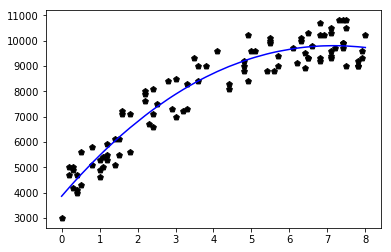

In [24]:
plt.scatter(X, Y, color='black',marker='p')
plt.plot(X3, regr.predict(X3_), color= "blue")
plt.show()

In [25]:
employee = numpy.array([[5],[17],[13]])
X3 = poly_regr.fit_transform(employee)
regr.predict(X3)

array([ 9294.79869615,  1407.9936877 ,  6608.44487232])

In [26]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)
df.head()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_,Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

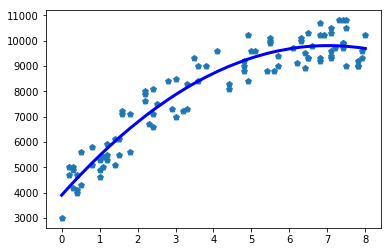

In [28]:

X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X,Y, marker='p')
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

## 多元回歸

In [38]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv', index_col=0)
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,,,,,,,
1,114300,1790,2,2,2,No,East
2,114200,2030,4,2,3,No,East
3,114800,1740,3,2,1,No,East
4,94700,1980,3,2,3,No,East
5,119800,2130,3,3,3,No,East


In [39]:
import pandas
brick = pandas.get_dummies(df['Brick'])
del brick['No']
df = pandas.concat([df, brick], axis = 1)
del df['Brick']
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Yes
Home,,,,,,,
1,114300,1790,2,2,2,East,0
2,114200,2030,4,2,3,East,0
3,114800,1740,3,2,1,East,0
4,94700,1980,3,2,3,East,0
5,119800,2130,3,3,3,East,0


In [41]:
neighborhood = pandas.get_dummies(df['Neighborhood'])
del neighborhood['West']
df = pandas.concat([df, neighborhood], axis = 1)
del df['Neighborhood']
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
Home,,,,,,,,
1,114300,1790,2,2,2,0,1,0
2,114200,2030,4,2,3,0,1,0
3,114800,1740,3,2,1,0,1,0
4,94700,1980,3,2,3,0,1,0
5,119800,2130,3,3,3,0,1,0


In [43]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East','North']]
y = df['Price']
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
import statsmodels.api as sm
X2  = sm.add_constant(X)
est = sm.OLS(y, X2)
est2  = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 18 Nov 2017   Prob (F-statistic):           8.25e-50
Time:                        12:32:09   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

## 計算AIC

In [52]:
est2.aic

2729.3189814012494

In [53]:
predictorcols = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East','North']

In [67]:
len(predictorcols)

7

In [73]:
import itertools
AICS = {}
for k in range(1, len(predictorcols) + 1):
    for variables in itertools.combinations(predictorcols, k):
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(y, predictors2)
        res = est.fit()
        AICS[variables] = res.aic

In [79]:
from collections import Counter
c = Counter(AICS)
c.most_common()[:-10:-1]

[(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
  2729.3189814012494),
 (('SqFt', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'), 2734.6399256283712),
 (('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East', 'North'), 2741.3156609981506),
 (('SqFt', 'Offers', 'Yes', 'East', 'North'), 2748.8490492259953),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East'),
  2766.624649944451),
 (('SqFt', 'Bathrooms', 'Yes', 'East', 'North'), 2776.9030655919946),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Yes', 'East', 'North'),
  2777.8496734305609),
 (('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East'), 2779.7703894909137),
 (('SqFt', 'Bedrooms', 'Yes', 'East', 'North'), 2783.1443744389539)]

## 時間序列

In [85]:
import pandas
df = pandas.read_csv('gt.csv', date_parser= ['週'])
df.index = df['週']
del df['週']

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3_1\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


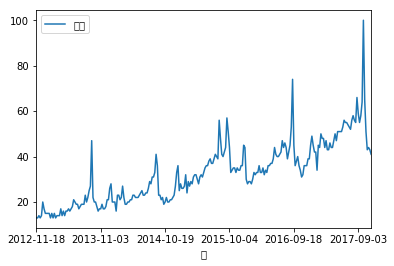

In [87]:
%pylab inline
df.plot(kind = 'line')

In [88]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

X = df['燒肉'].astype(float).values

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


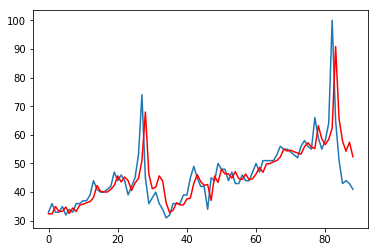

In [93]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Using HMM to predict Stock
- https://www.slideshare.net/ChiuYW/hidden-markov-model-stock-prediction?qid=857189d1-bcb2-4a1d-9eee-e0a4123bef63&v=&b=&from_search=5